En este archivo voy a hacer un EDA al conjunto de datos correspondiente a user_reviews.

Primero cargamos las librerías necesarias para hacer el EDA

In [1]:
# Importación de las librerías necesarias para trabajar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Ahora, cargo el archivo que contiene el conjunto de datos que vamos a analizar
reseñas = pd.read_parquet("user_reviews_complete.parquet")
# Verifico si el archivo se cargó correctamente
reseñas

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637
...,...,...,...,...,...,...,...,...
59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244
59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244
59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley
59303,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley


A primera vista, vemos que es una tabla de 59305 filas y 8 columnas. Veamos más información al respecto.

In [3]:
reseñas.describe(include='all')

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
count,59305,59305,59305,59305,59305,59305,59305,59305
unique,186,1906,1015,3682,1344,2,55313,25458
top,,"Posted June 21, 2014.",,730,No ratings yet,True,good game,76561198094665607
freq,51154,225,53165,3759,30168,52473,100,20


Con esto vemos por ejemplo que de las 59305 reseñas, fueron hechas por menos de la mitad, 25458 usuarios. Veamos ahora más información acerca del Dataframe

In [4]:
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        59305 non-null  object
 1   posted       59305 non-null  object
 2   last_edited  59305 non-null  object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59305 non-null  object
 7   user_id      59305 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.2+ MB


Vemos que las columnas aparentemente no tienen nulos, pero si nos concentramos en la primera de ella, podemos observar que tiene celdas vacías. Estas celdas en su interior tienen strings vacíos (""), por lo cuál voy a hacer esta pequeña transformación y ejecutar el método .info() nuevamente.

In [5]:
# Usamos replace con regex para que coincidan los string vacíos.
reseñas = reseñas.replace(r'^\s*$', float('nan'), regex=True)
reseñas

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,NaN,"Posted July 15, 2011.",NaN,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,NaN,"Posted April 21, 2011.",NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,NaN,"Posted June 24, 2014.",NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,NaN,"Posted September 8, 2013.",NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637
...,...,...,...,...,...,...,...,...
59300,NaN,Posted July 10.,NaN,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244
59301,NaN,Posted July 8.,NaN,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244
59302,1 person found this review funny,Posted July 3.,NaN,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley
59303,NaN,Posted July 20.,NaN,730,No ratings yet,True,:D,LydiaMorley


Vemos que cambió, vamos ahora con el método .info() nuevamente.

In [6]:
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        8151 non-null   object
 1   posted       59305 non-null  object
 2   last_edited  6140 non-null   object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59267 non-null  object
 7   user_id      59305 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.2+ MB


Ahora vamos a gráficas que tan vacías / llenas están las columnas según la información proporcionada anteriormente. Para ello nos ayudamos de matplotlib.

In [7]:
for datos_faltantes in reseñas.isnull().sum():
    print(datos_faltantes)

51154
0
53165
0
0
0
38
0


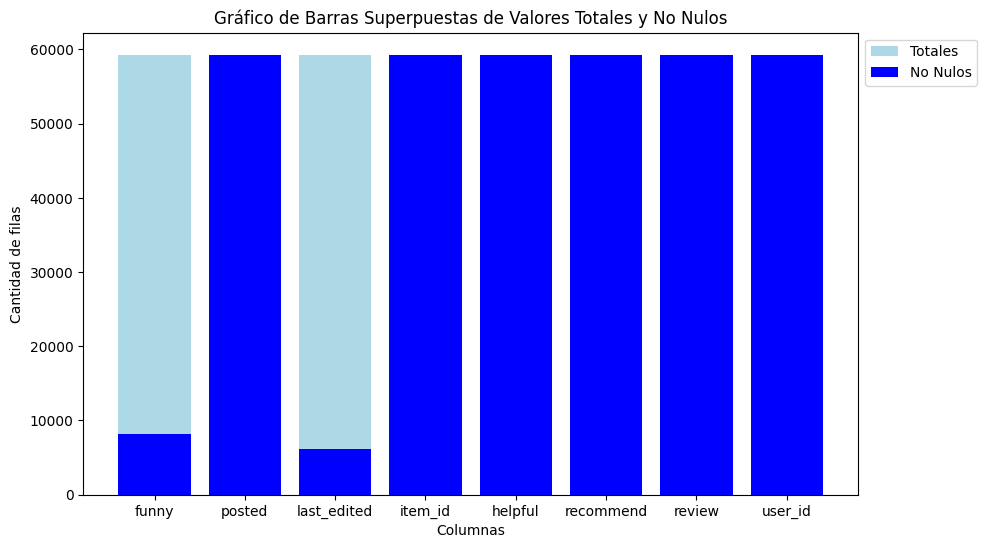

In [8]:
# Creamos un array de (8,1), este va a contener la cantidad total de filas en el Dataframe de forma reiterativa
total_reiterativo = np.full(8,59305)

# A partir de un bucle, llenamos una lista que contenga la cantidad de filas faltantes en cada columna.
filas_faltantes_por_columna = []
for datos_faltantes in reseñas.isnull().sum():
    filas_faltantes_por_columna.append(datos_faltantes)

# Calculamos los valores no nulos
celdas_llenas = np.array(total_reiterativo) - np.array(filas_faltantes_por_columna)

fig, ax = plt.subplots(figsize=(10, 6))

# Creamos las barras para los totales (nulos + no nulos) en color celeste claro
ax.bar(range(len(total_reiterativo)), total_reiterativo, color='lightblue', label='Totales')

# Creamos las barras para los no nulos en color azul
ax.bar(range(len(celdas_llenas)), celdas_llenas, color='blue', label='No Nulos')

# Añadir etiquetas y título
ax.set_xticks(range(len(total_reiterativo)))
ax.set_xticklabels(reseñas.columns)
ax.set_ylabel('Cantidad de filas')
ax.set_xlabel('Columnas')
ax.set_title('Gráfico de Barras Superpuestas de Valores Totales y No Nulos')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Mostrar el gráfico
plt.show()


Vemos que tanto la columna funny cómo last_edited tienen una cantidad de nulos tan grande, que convendría eliminarlas a las columnas en lugar de eliminar sus filas vacías. Ya que el hacerlo, reduciría significativamente el Dataframe. Exploremos ahora cada una de estas columnas para ver que información nos ofrece.

In [9]:
reseñas[~reseñas["funny"].isnull()]["funny"]

18       3 people found this review funny
19       1 person found this review funny
20       2 people found this review funny
24       1 person found this review funny
27       1 person found this review funny
                       ...               
59283    2 people found this review funny
59284    3 people found this review funny
59292    1 person found this review funny
59297    1 person found this review funny
59302    1 person found this review funny
Name: funny, Length: 8151, dtype: object

Cómo podemos observar y también deducir, en cada reseña dentro de Steam, los usuarios tienen la opción de clasificar si las reseña les resultó divertida. Es lógico pensar que no todos los usuarios interactuaron con esta funcionalidad, al menos en las reseñas que tengo disponibles en este DataFrame. Sólo cómo curiosidad, podríamos ver cuál fue la reseña que más personas catalogaron cómo graciosa divertida. 

In [10]:
# Para ello, primero importamos el módulo re
import re

# Creamos una lista que va a almacenar listas que contienen strings con los números dentro de cada reseña
lista = []

# Creamos un bucle for para recorrer cada reseña en el conjunto de reseñas que los usuarios determinaron cómo funny
for reseña in reseñas[~reseñas["funny"].isnull()]["funny"]:
    # Agregamos a la lista previamente creada sólo la parte númerica del string
    lista.append(re.findall(r'\d+', reseña))

# A partir de la lista, creamos una nueva lista que va a almacenar los números contenidos dentro de las listas en nuestra lista original
lista_nueva = []
for lista_interna in lista: # Iteramos por cada lista interna
    for str_numero in lista_interna: # Iteramos por cada string númerico dentro de la lista (es uno sólo por lista_interna)
        lista_nueva.append(int(str_numero)) # Transformamos en entero el número y lo agregamos a la lista nueva

print(lista_nueva) # Mostramos en pantalla

[3, 1, 2, 1, 1, 5, 1, 1, 17, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 524, 4, 1, 3, 1, 1, 1, 1, 1, 12, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 6, 4, 1, 2, 5, 1, 1, 1, 1, 7, 1, 103, 2, 1, 1, 3, 1, 1, 1, 2, 16, 1, 1, 34, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 6, 1, 2, 3, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 7, 3, 1, 1, 1, 1, 1, 1, 2, 9, 1, 12, 45, 2, 2, 11, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 2, 1, 97, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 7, 1, 3, 1, 4, 4, 1, 1, 2, 2, 1, 5, 2, 2, 2, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 207, 3, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 6, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 6, 2, 718, 2, 1, 1, 1, 1, 1, 1, 1, 1, 23, 1, 1, 1, 1, 2, 100, 3, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 4, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 3, 11, 1, 3, 1, 4, 2, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 5, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 1

Ahora quiero determinar las top 10 reseñas que acumulan más cantidad de funny's

In [11]:
top_funny = sorted(lista_nueva, reverse=True)[:10] # Ordenamos la lista de forma inversa, y nos quedamos con los primeros 10 valores
print(top_funny)  # Vemos en pantalla el resultado

[956, 954, 946, 876, 856, 852, 841, 830, 825, 759]


Ahora a partir de estos números, voy a buscar cada una de estas reseñas, y las voy a mostrar en pantalla

In [12]:
lista_indices = [] # Creamos una lista que va almacenar los indices correspondientes a las filas que corresponden con las reseñas más votadas
# Por cada número dentro de la lista top_funny
for cantidad_funny in top_funny:

    indice = reseñas[(reseñas['funny'].str.contains(str(cantidad_funny))) & (~reseñas["funny"].isnull())].index[0]

    lista_indices.append(indice)

print(lista_indices)

[34847, 29114, 17733, 50145, 6788, 51596, 21978, 23493, 55185, 14456]


Ahora, con esta lista de indices, filtro el dataframe 

In [13]:
reseñas[reseñas.index.isin(lista_indices)]

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
6788,856 people found this review funny,Posted May 29.,NaN,326460,793 of 941 people (84%) found this review helpful,True,"This game is:10% luck,20% skill,15% concentrat...",xXCOOK1EMANXx
14456,759 people found this review funny,"Posted June 26, 2015.",NaN,209160,519 of 656 people (79%) found this review helpful,False,This game is worse than my chance of getting a...,fartofsmellyness
17733,946 people found this review funny,"Posted January 9, 2015.",NaN,313740,831 of 954 people (87%) found this review helpful,True,Look behind you simulator.lmao,russelmao
21978,841 people found this review funny,"Posted May 3, 2015.",NaN,242920,589 of 639 people (92%) found this review helpful,True,After accidentally closing my eyes to blink wh...,Luxzackian
23493,830 people found this review funny,"Posted March 6, 2015.","Last edited March 15, 2015.",333600,535 of 667 people (80%) found this review helpful,True,"I was only 9 years oldI loved Chocola so much,...",76561198045400287
29114,"1,954 people found this review funny","Posted December 4, 2015.","Last edited December 5, 2015.",8930,"1,581 of 1,678 people (94%) found this review ...",True,I can sum this game up in one game play.I play...,76561198109249377
34847,956 people found this review funny,"Posted May 19, 2015.",NaN,292030,"1,144 of 1,356 people (84%) found this review ...",True,Tutorial area took me 8 hours to complete.I re...,marhan
50145,876 people found this review funny,"Posted November 29, 2014.","Last edited November 29, 2014.",218620,"787 of 1,040 people (76%) found this review he...",True,"Ah, the world of Payday 2...A world where armo...",76561198060545297
51596,852 people found this review funny,"Posted November 22, 2014.",NaN,730,"1,072 of 1,208 people (89%) found this review ...",True,"Got called a Hacker, Best moment in my life",Scrfiin
55185,825 people found this review funny,"Posted January 14, 2015.",NaN,304930,474 of 588 people (81%) found this review helpful,True,Started as a naked person in a zombie apocalyp...,whatismyid


Veamos sólo las reseñas

In [14]:
for reseña_top_graciosa in reseñas[reseñas.index.isin(lista_indices)]["review"]:
    print(reseña_top_graciosa)
    print()

This game is:10% luck,20% skill,15% concentrated power of will,5% pleasure,50% pain,100% reason to purchase the game.

This game is worse than my chance of getting a girlfriend.

Look behind you simulator.lmao

After accidentally closing my eyes to blink while tasking my first batch of villagers, I opened them to find everyone dead from starvation except five children. Thankfully there were enough cabbages in storage for them to survive for two years until they grew up. After tasking them as fishermen on a nearby river I learned fishermen can consistently fish about three fish a year, enough to sustain almost 0.000001% of my population. As my village began to grow once more I felt the shattered fragments of my soul beginning to piece themselves back together. However, six fishermen in a village of seven people was not enough, and I quickly learned this as I watched all my young adults starve once more. I still had two people left. As they progressively had more and more sex and my ince

Confirmamos que sí, algunas son bastante graciosas.

Veamos ahora la columna last_edited

In [15]:
reseñas[~reseñas["last_edited"].isnull()]["last_edited"] # Vemos que lo que nos ofrece esta columna es información acerca de cuando fué la última vez que se editó la reseña. Es lógico pensar que no todas las personas luego de hacer una reseña, vuelven a editarla, esa sería mi suposición de por qué hay tanta cantidad de nulos. 

7         Last edited December 5, 2015.
23       Last edited November 25, 2013.
24       Last edited November 25, 2013.
25           Last edited June 22, 2014.
26       Last edited November 25, 2013.
                      ...              
59190    Last edited September 8, 2015.
59196              Last edited June 17.
59197             Last edited April 20.
59200             Last edited April 29.
59281            Last edited August 13.
Name: last_edited, Length: 6140, dtype: object

Tanto la columna "last_edited" cómo "funny" están sujetas a ser eliminadas debido a la poca información útil que ofrecen para este proyecto, más sin embargo, en este archivo decido conservarlas.

In [16]:
# Si recordamos los nulos por cada columna teníamos
reseñas.isnull().sum()

funny          51154
posted             0
last_edited    53165
item_id            0
helpful            0
recommend          0
review            38
user_id            0
dtype: int64

Vemos que la 3ª y última columna con datos faltantes es la columna review, exploremos esta columna.

In [17]:
reseñas["review"]

0        Simple yet with great replayability. In my opi...
1                     It's unique and worth a playthrough.
2        Great atmosphere. The gunplay can be a bit chu...
3        I know what you think when you see this title ...
4        For a simple (it's actually not all that simpl...
                               ...                        
59300    a must have classic from steam definitely wort...
59301    this game is a perfect remake of the original ...
59302    had so much fun plaing this and collecting res...
59303                                                   :D
59304                                       so much fun :D
Name: review, Length: 59305, dtype: object

Vemos que en esta columna se almacenan las reseñas hechas por los usuarios. A partir de este hecho, decido eliminar las celdas con datos faltantes, ya que esta columna es la más relevante del conjunto de datos, y al estar vacía, no me aporta información útil.

In [21]:
reseñas[reseñas["review"].isnull()].head(3)

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
614,NaN,"Posted December 13, 2013.",NaN,570,No ratings yet,True,NaN,76561198070263209
914,NaN,"Posted November 25, 2013.",NaN,215530,0 of 3 people (0%) found this review helpful,True,NaN,Azrafael
3095,NaN,Posted March 11.,NaN,550,No ratings yet,True,NaN,2ZESTY4ME


In [32]:
# Decido eliminarlas de la siguiente manera
reseñas = reseñas[~reseñas["review"].isnull()]
reseñas.shape # Se eliminaron las 38 filas que contenían celdas vacías en la columna "review"

(59267, 8)

In [33]:
reseñas.columns

Index(['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend',
       'review', 'user_id'],
      dtype='object')

Veamos ahora una distribución de las recomendaciones en base a las reseñas hechas por los usuarios.

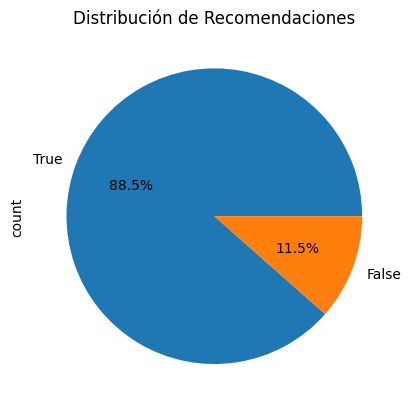

In [34]:
reseñas['recommend'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Recomendaciones')
plt.show()

Podemos ver que en su gran mayoría (el 88.5%) de las reseñas hechas por los usuarios recomiendan los juegos a los cuáles les están haciendo la reseña. 

Veamos ahora la relación entre la columna "funny" y la columna "helpful"

Para ello, primero transformamos estas dos columnas en númericas, voy a dejar por un lado, sólo el número que representa la cantidad de personas que encontraron útil la reseña, y por el otro, el primer número dentro de la columna "helpful"

In [39]:
reseñas["funny_numerico"] = reseñas["funny"].str.extract('(\d+)')
reseñas[~reseñas["funny"].isnull()]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\crisr\AppData\Local\Temp\ipykernel_860\3341580286.py:1: SyntaxWarning: invalid escape sequence '\d'
  reseñas["funny_numerico"] = reseñas["funny"].str.extract('(\d+)')
C:\Users\crisr\AppData\Local\Temp\ipykernel_860\3341580286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reseñas["funny_numerico"] = reseñas["funny"].str.extract('(\d+)')


,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,funny_numerico
18,3 people found this review funny,"Posted April 15, 2014.",NaN,211420,35 of 43 people (81%) found this review helpful,True,Git gud,maplemage,3
19,1 person found this review funny,"Posted December 23, 2013.",NaN,211820,12 of 16 people (75%) found this review helpful,True,"It's like Terraria, you play for 9 hours strai...",maplemage,1
20,2 people found this review funny,"Posted March 14, 2014.",NaN,730,5 of 5 people (100%) found this review helpful,True,"Hold shift to win, Hold CTRL to lose.",maplemage,2
24,1 person found this review funny,"Posted October 21, 2012.","Last edited November 25, 2013.",550,1 of 1 people (100%) found this review helpful,True,This game is fantastic if you are looking to D...,Wackky,1
27,1 person found this review funny,Posted May 20.,NaN,730,0 of 1 people (0%) found this review helpful,True,ZIKA DO BAILE,76561198079601835,1
...,...,...,...,...,...,...,...,...,...
59283,2 people found this review funny,Posted July 27.,NaN,265630,1 of 15 people (7%) found this review helpful,False,DON'T INSTALL THIS GAME!!!!!!!!!!!!!!!!!!!!!!!...,MeloncraftLP,2
59284,3 people found this review funny,Posted August 2.,NaN,306130,4 of 19 people (21%) found this review helpful,False,"Game is terrible! So, Iv tried 15hrs tryin to ...",76561198277602337,3
59292,1 person found this review funny,Posted April 25.,NaN,427730,1 of 2 people (50%) found this review helpful,True,dont ask,sexyawp,1
59297,1 person found this review funny,Posted June 23.,NaN,570,1 of 1 people (100%) found this review helpful,True,Well Done,76561198310819422,1


Hacemos lo mismo con la columna helpful

In [40]:
reseñas["helpful_numerico"] = reseñas["helpful"].str.extract('(\d+)')
reseñas.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\crisr\AppData\Local\Temp\ipykernel_860\881507609.py:1: SyntaxWarning: invalid escape sequence '\d'
  reseñas["helpful_numerico"] = reseñas["helpful"].str.extract('(\d+)')
C:\Users\crisr\AppData\Local\Temp\ipykernel_860\881507609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reseñas["helpful_numerico"] = reseñas["helpful"].str.extract('(\d+)')


,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,funny_numerico,helpful_numerico
0,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,NaN,NaN
1,NaN,"Posted July 15, 2011.",NaN,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,NaN,NaN
2,NaN,"Posted April 21, 2011.",NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,NaN,NaN
3,NaN,"Posted June 24, 2014.",NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,NaN,15
4,NaN,"Posted September 8, 2013.",NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,NaN,0


Perfecto, vemos que funcionó correctamente, así que ahora procedemos a crear otro Dataframe, este va a contener nada más las columnas funny y helpful numerico, sólo las filas dónde ambas columnas contengan datos.

In [44]:
reseñas_clean = reseñas.dropna(subset=['funny_numerico', 'helpful_numerico'])
reseñas_clean = reseñas_clean[["funny_numerico","helpful_numerico"]]
reseñas_clean.head()

,funny_numerico,helpful_numerico
18,3,35
19,1,12
20,2,5
24,1,1
27,1,0


Ahora vamos a graficar la relación entre estas dos columnas.

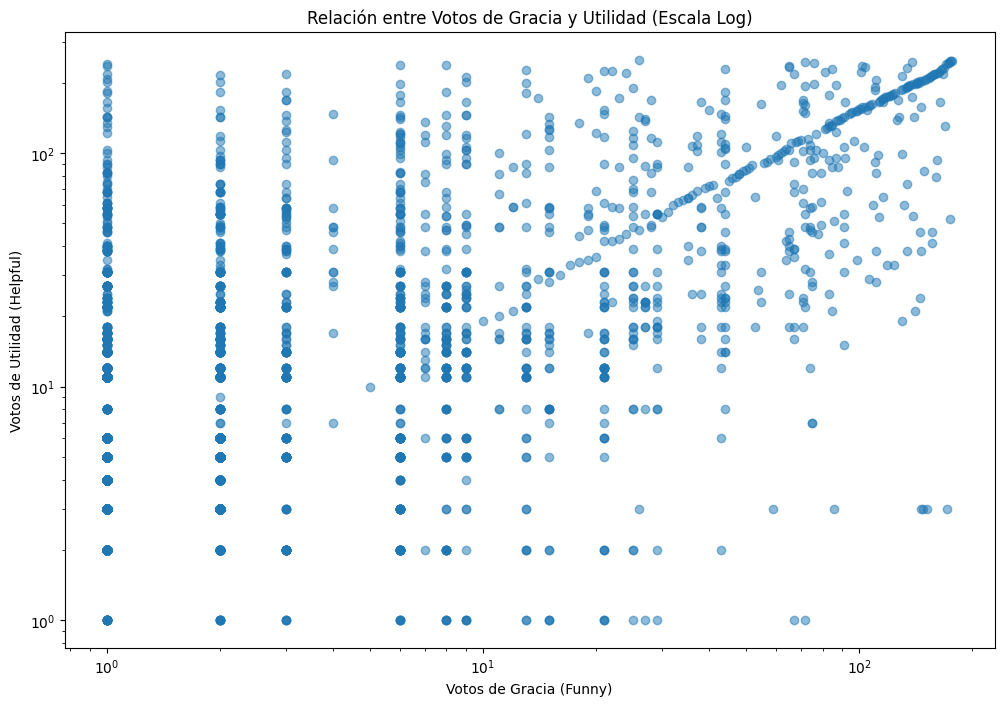

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(reseñas_clean["funny_numerico"], reseñas_clean["helpful_numerico"], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Votos de diversión (Funny)')
plt.ylabel('Votos de utilidad (Helpful)')
plt.title('Relación entre Votos de Gracia y Utilidad (Escala Log)')
plt.show()

Tuve que aplicar una escala logaritmica porque los datos estaban muy dispersos, pero podemos ver con esto que hay una relación entre la gente que encuentra graciosa las reseñas con la gente que también les resulta útil. Esto se podría interpretar de varias maneras, la primera es que a través del humor, podemos conectar mucho más con las personas. La segunda es que, suponiendo que una reseña al ser considerada graciosa por varias personas, esta misma se va posicionando más arriba entre todas las reseñas hechas al juego, por lo cuál, tiene mayor visibilidad, y es mucho más sencillo para un usuario determinar si una reseña es útil o no si está a la vista que si se encuentra perdida en las profundidades de todas las reseñas.

Veamos ahora la distribución de la longitud de las reseñas.

C:\Users\crisr\AppData\Local\Temp\ipykernel_860\2373576659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reseñas['review_length'] = reseñas['review'].str.len()


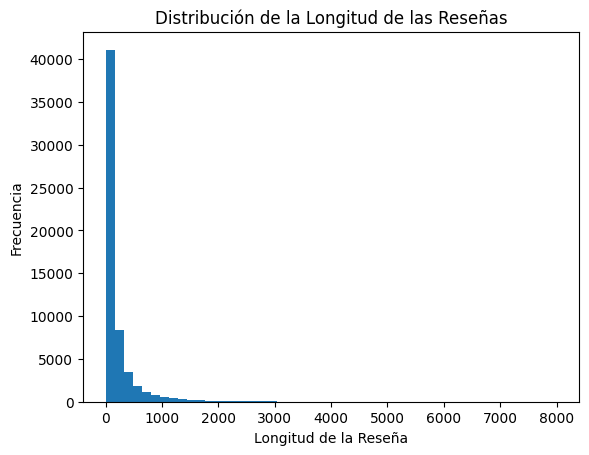

In [56]:
reseñas['review_length'] = reseñas['review'].str.len()
plt.hist(reseñas['review_length'], bins=50)
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reseñas')
plt.show()

Podemos observar que la mayor cantidad de reseñas tienen entre 0 y 1000 caracteres

Veamos ahora la evolución temporal de las reseñas. Echemos un vistazo primero a nuestra columna temporal

In [59]:
reseñas["posted"] # Vemos que hay que normalizar la columna para obtener por una parte el año, y por otra parte, la descripción temporal. Así que procedemos...

0         Posted November 5, 2011.
1            Posted July 15, 2011.
2           Posted April 21, 2011.
3            Posted June 24, 2014.
4        Posted September 8, 2013.
                   ...            
59300              Posted July 10.
59301               Posted July 8.
59302               Posted July 3.
59303              Posted July 20.
59304               Posted July 2.
Name: posted, Length: 59267, dtype: object

In [64]:
# Función para extraer el año
def extract_year(text):
    import re
    match = re.search(r'\b\d{4}\b', text)
    return match.group(0) if match else np.NaN

# Función para extraer la descripción
def extract_description(text):
    import re
    match = re.search(r'\b\d{4}\b', text)
    if match:
        return text.replace(match.group(0), '').strip()
    else:
        return text

# Aplicamos las funciones al DataFrame
reseñas['año'] = reseñas['posted'].apply(extract_year)
reseñas['Descripcion Temporal'] = reseñas['posted'].apply(extract_description)

C:\Users\crisr\AppData\Local\Temp\ipykernel_860\1826855665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reseñas['año'] = reseñas['posted'].apply(extract_year)
C:\Users\crisr\AppData\Local\Temp\ipykernel_860\1826855665.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reseñas['Descripcion Temporal'] = reseñas['posted'].apply(extract_description)


In [65]:
# Echemos un vistazo a cómo quedaron estas dos columnas
reseñas[["año","Descripcion Temporal"]]

,año,Descripcion Temporal
0,2011,"Posted November 5, ."
1,2011,"Posted July 15, ."
2,2011,"Posted April 21, ."
3,2014,"Posted June 24, ."
4,2013,"Posted September 8, ."
...,...,...
59300,NaN,Posted July 10.
59301,NaN,Posted July 8.
59302,NaN,Posted July 3.
59303,NaN,Posted July 20.


Me voy a quedar sólo con las celdas que tienen los años disponibles.

In [69]:
reseñas_año = reseñas[~reseñas["año"].isnull()]["año"]

In [57]:
reseñas['posted'] = pd.to_datetime(reseñas['posted'])
reseñas.resample('M', on='posted').size().plot()
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.title('Evolución Temporal de las Reseñas')
plt.show()

C:\Users\crisr\AppData\Local\Temp\ipykernel_860\3107840215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reseñas['posted'] = pd.to_datetime(reseñas['posted'])


DateParseError: Unknown datetime string format, unable to parse: Posted November 5, 2011., at position 0